In [29]:
source("./Functions/MOCL.R") 
source("./Functions/lambda_selection.R")
source("./Functions/MOCL_wcss.R")
source("./Functions/Adaptive_MAM.R") 

source("./Functions/SKM_gap.R")
source("./Functions/evaluation.R")

library(VarSelLCM) # VarselLCM
library(cluster)     # PAM

library(ggplot2)
library(gridExtra)
library(ggpubr)
library(ggthemes)
library(GGally)
library(RColorBrewer)
library(corrplot)
library(dplyr)
library(pdfCluster)
library(fossil)
options(warn=-1)
library(Rtsne)
library(latex2exp)

In [30]:
mlb2021=read.csv("./stats2021.csv")
mlb2021 = mlb2021[,-c(1,2,3,4)]

colnames(mlb2021)=c("strikeout","walk","batting","power","woba","velocity",
                 "angle","well-hit","hard","contact")

mlb_x = scale(mlb2021[,-5])
y= mlb2021[,5]

# Clustering

In [31]:
kk=4
t_a=Sys.time()
pam <- pam(mlb_x,kk)
t_b=Sys.time()
km <- KMeans_rcpp(mlb_x,kk)
t_c=Sys.time()
mocl <- MOCL_wcss(Xf=mlb_x,k=kk,lambda_seq=seq.default(from=0.001,to=3,length=100),delta=0.01)
t_d=Sys.time()
skm <- Sparse_km(data=mlb_x,kk=kk,nperms_n=10)
t_e=Sys.time()
varsel <- VarSelCluster(mlb_x, kk, nbcores = 1, crit.varsel = 'BIC') 
t_f=Sys.time()

    

01234
012345


In [32]:
t_d-t_c
t_e-t_d
t_f-t_e

t_c-t_b
t_b-t_a

Time difference of 4.192692 secs

Time difference of 0.3251472 secs

Time difference of 0.827894 secs

Time difference of 0.001085997 secs

Time difference of 0.002191782 secs

In [33]:
clu_mocl=(kk+1)-mocl$cluster
clu_skm=skm$cluster_1sd
clu_vsl=fitted(varsel)
clu_km=km$cluster
clu_pam=pam$cluster

## Variable selection

In [34]:
sparse_mat=rbind(t(matrix(apply(abs(mocl$fx),2,sum)>0)), 
                skm$sparse_1sd,slot(slot(varsel,'model'),'omega'))

rownames(sparse_mat)=c("MOCL","SKM","VSL")
sparse_mat

,strikeout,walk,batting,power,velocity,angle,well-hit,hard,contact
MOCL,1,0,0,1,0,0,0,1,1
SKM,1,0,0,1,1,0,0,1,1
VSL,1,1,0,1,1,0,0,1,1


## t-SNE

In [35]:
set.seed(243)
tsne<-Rtsne(mlb2021[,-5],dim=2,perplexity=30, verbose=TRUE, max_iter = 500)

Performing PCA
Read the 132 x 9 data matrix successfully!
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.00 seconds (sparsity = 0.821281)!
Learning embedding...
Iteration 50: error is 50.075463 (50 iterations in 0.01 seconds)
Iteration 100: error is 51.493878 (50 iterations in 0.01 seconds)
Iteration 150: error is 52.334448 (50 iterations in 0.01 seconds)
Iteration 200: error is 54.661886 (50 iterations in 0.01 seconds)
Iteration 250: error is 51.110302 (50 iterations in 0.01 seconds)
Iteration 300: error is 1.211924 (50 iterations in 0.01 seconds)
Iteration 350: error is 0.577932 (50 iterations in 0.01 seconds)
Iteration 400: error is 0.383346 (50 iterations in 0.01 seconds)
Iteration 450: error is 0.380553 (50 iterations in 0.00 seconds)
Iteration 500: error is 0.380810 (50 iterations in 0.00 seconds)
Fitting performed in 0.06 seconds.


In [36]:
lab_mocl=as.factor(clu_mocl)
lab_skm=as.factor(clu_skm)
lab_vsl=as.factor(clu_vsl)
lab_km=as.factor(clu_km)
lab_pam=as.factor(clu_pam)

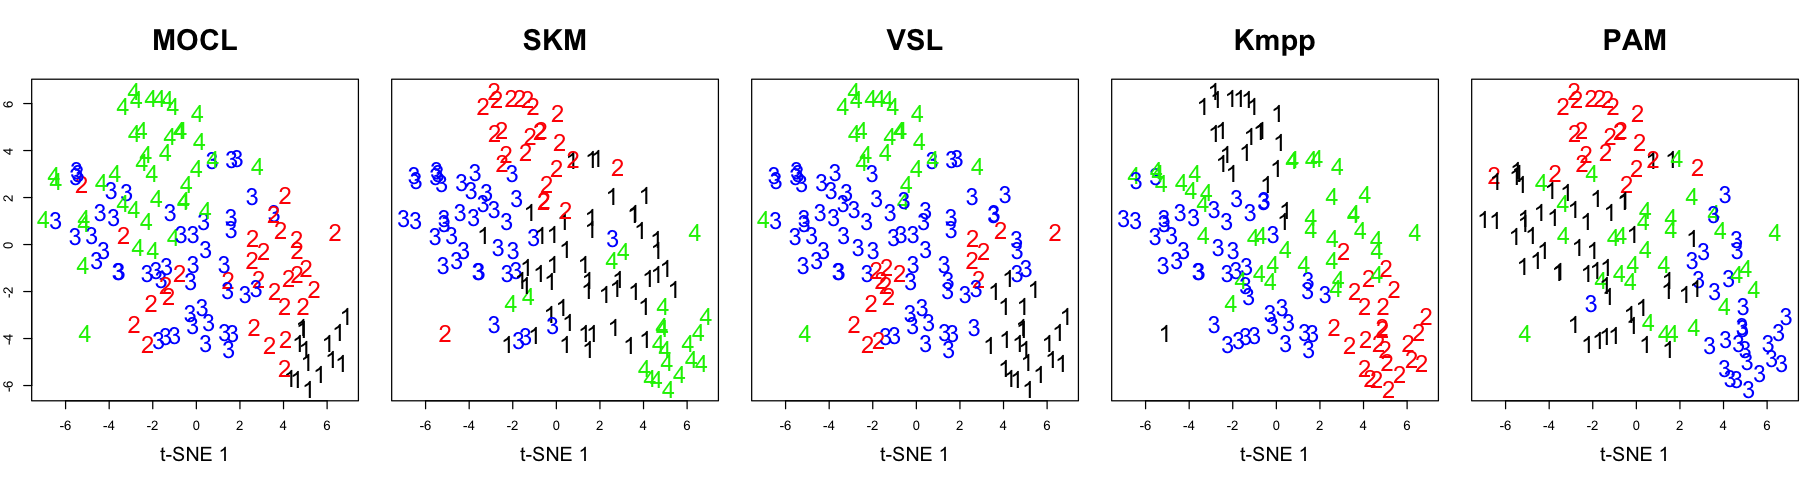

In [37]:
options(repr.plot.width = 15, repr.plot.height = 4)
par(mfrow=c(1,5))
par(mar=c(5,2,5,0.1))
#par(mar=c(5,3,5,3))


colors=c("Black","Red","Blue","green 2")




pchs=c(0,2,3,4,5,1)
names(colors) = c(1:kk)
tsne_y=tsne$Y
################################
plot(tsne_y,t='n',col=lab_mocl,pch=19,main="MOCL",cex.main=2.2,
     xlab="t-SNE 1",ylab="t-SNE 2",cex.lab=1.5,cex.axis=1)
text(tsne_y, labels=lab_mocl, col=colors[lab_mocl],cex=1.8)


plot(tsne_y,t='n',col=lab_skm,pch=19,main="SKM",cex.main=2.2,
     xlab="t-SNE 1",ylab="",cex.lab=1.6,yaxt="n",cex.lab=1.5,cex.axis=1)
text(tsne_y, labels=lab_skm, col=colors[lab_skm],cex=1.8)
plot(tsne_y,t='n',col=lab_vsl,pch=19,main="VSL",cex.main=2.2,
     xlab="t-SNE 1",ylab="",cex.lab=1.6,yaxt="n",cex.lab=1.5,cex.axis=1)
text(tsne_y, labels=lab_vsl, col=colors[lab_vsl],cex=1.8)
plot(tsne_y,t='n',col=lab_km,pch=19,main="Kmpp",cex.main=2.2,
     xlab="t-SNE 1",ylab="",cex.lab=1.6,yaxt="n",cex.lab=1.5,cex.axis=1)
text(tsne_y, labels=lab_km, col=colors[lab_km],cex=1.8)
plot(tsne_y,t='n',col=lab_pam,pch=19,main="PAM",cex.main=2.2,
     xlab="t-SNE 1",ylab="",cex.lab=1.6,yaxt="n",cex.lab=1.5,cex.axis=1)
text(tsne_y, labels=lab_pam, col=colors[lab_pam],cex=1.8)

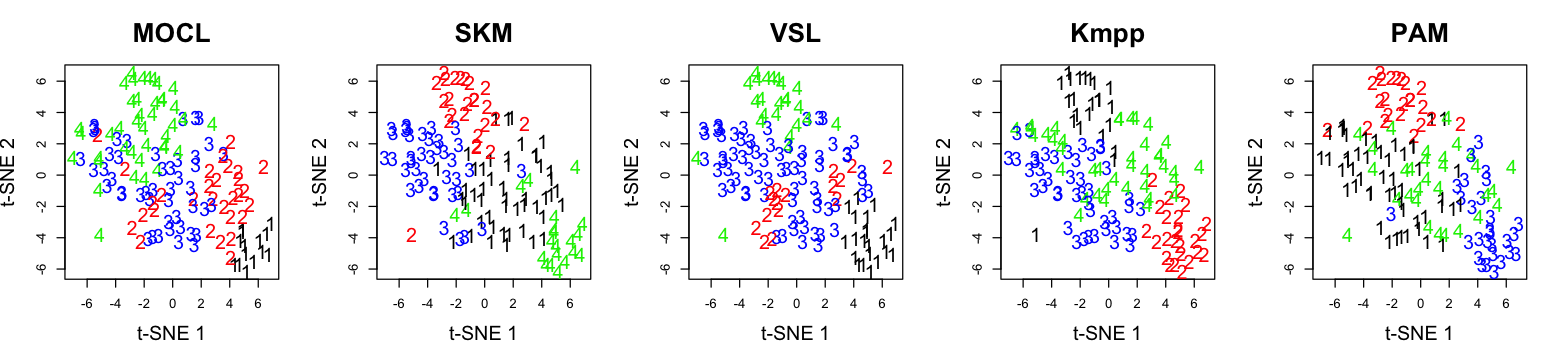

In [38]:
options(repr.plot.width = 13, repr.plot.height = 3)
par(mfrow=c(1,5))

colors=c("Black","Red","Gold","green","Blue")

colors=c("Black","Red","Blue","green 2")




names(colors) = c(1:kk)

plot(tsne$Y,t='n',col=lab_mocl,pch=19,main="MOCL",cex.main=2,xlab="t-SNE 1",ylab="t-SNE 2",cex.lab=1.5)
text(tsne$Y, labels=lab_mocl, col=colors[lab_mocl],cex=1.5)
plot(tsne$Y,t='n',col=lab_skm,pch=19,main="SKM",cex.main=2,xlab="t-SNE 1",ylab="t-SNE 2",cex.lab=1.5)
text(tsne$Y, labels=lab_skm, col=colors[lab_skm],cex=1.5)
plot(tsne$Y,t='n',col=lab_vsl,pch=19,main="VSL",cex.main=2,xlab="t-SNE 1",ylab="t-SNE 2",cex.lab=1.5)
text(tsne$Y, labels=lab_vsl, col=colors[lab_vsl],cex=1.5)
plot(tsne$Y,t='n',col=lab_km,pch=19,main="Kmpp",cex.main=2,xlab="t-SNE 1",ylab="t-SNE 2",cex.lab=1.5)
text(tsne$Y, labels=lab_km, col=colors[lab_km],cex=1.5)
plot(tsne$Y,t='n',col=lab_pam,pch=19,main="PAM",cex.main=2,xlab="t-SNE 1",ylab="t-SNE 2",cex.lab=1.5)
text(tsne$Y, labels=lab_pam, col=colors[lab_pam],cex=1.5)




In [39]:
rand.index(clu_mocl,clu_skm)
rand.index(clu_mocl,clu_vsl)

[1] 0.7432339

[1] 0.7262318

## Rand index

In [40]:
rand.index(clu_mocl,clu_km)
rand.index(clu_mocl,clu_pam)
rand.index(clu_mocl,clu_skm)
rand.index(clu_mocl,clu_vsl)

[1] 0.7086514

[1] 0.7201018

[1] 0.7432339

[1] 0.7262318

## Estimated functions

In [41]:
dd=nor_minmax(mlb_x)
col_lst=c("Magenta","Blue","Gold","red","grey","Dark Magenta","Cyan","Dark Orange","Lime Green")

In [42]:
dd_mo=dd[,sparse_mat[1,]>0]
col_mo=col_lst[sparse_mat[1,]>0]
fx_mo=-mocl$fx[,sparse_mat[1,]>0]


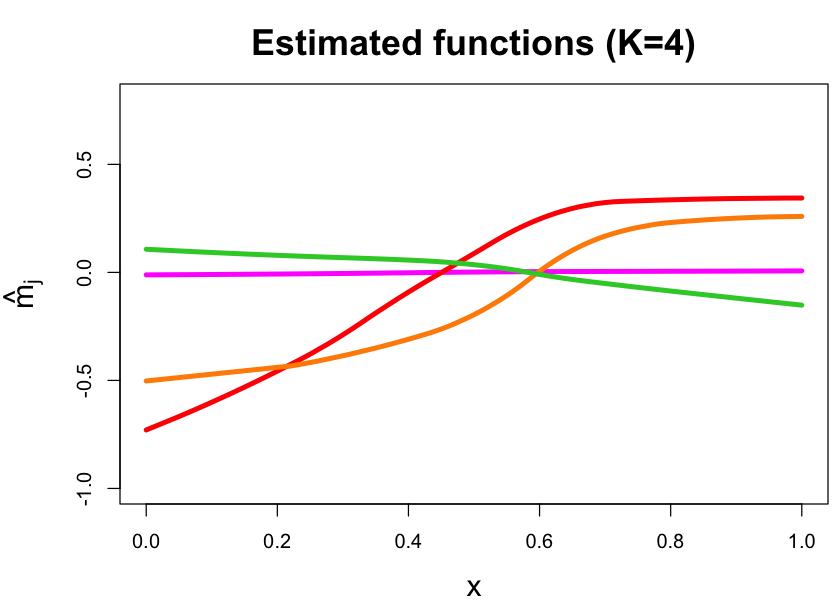

In [43]:
options(repr.plot.width = 7, repr.plot.height = 5)
par(mar=c(4,5,3.5,0.5))
for(i in 1:ncol(dd_mo)){
    o_i=order(dd_mo[,i])
    if(i==1){
        plot(dd_mo[o_i,i],fx_mo[o_i,i],col=col_mo[i],type="l",
             lwd=4,ylim=c(-1,0.8),xlim=c(0,1),main="Estimated functions (K=4)",
            xlab=TeX("$x$"),ylab=TeX("$\\hat{m}_j$"),cex.main=1.8,cex.lab=1.5)
    }else{lines(dd_mo[o_i,i],fx_mo[o_i,i],col=col_mo[i],lwd=4)}
}

# Correlation

In [44]:
cor(c(y),clu_mocl,method="spearman")

[1] 0.6376605

In [49]:
cluster_mat=cbind(clu_mocl,clu_skm,clu_vsl,clu_km,clu_pam)
colnames(cluster_mat)=c("MOCL","SKM","VSL","Kmpp","PAM")

baseball_lst=list()


baseball_lst[["X"]]=mlb2021[,-5]
baseball_lst[["y"]]=mlb2021$woba
baseball_lst[["cluster_mat"]]=cluster_mat
baseball_lst[["var_sel"]]=sparse_mat
baseball_lst[["mocl"]]=mocl
###############################
# Save
saveRDS(baseball_lst,file="Baseball_K4.RData")